In [98]:
from skimage import io, morphology, color, util
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

data = "example/"

In [99]:
img  = io.imread(data + '1.tif')
img_gray = color.rgb2gray(img)

img_gray = util.img_as_ubyte(img_gray)
img_gray

array([[21, 29, 17, ..., 40, 45, 36],
       [25, 30, 36, ..., 33, 20, 40],
       [31, 30, 19, ..., 33, 26, 42],
       ...,
       [16, 18, 24, ...,  0,  8,  5],
       [33, 37, 25, ..., 10, 10, 15],
       [24,  9, 34, ...,  9, 18,  3]], dtype=uint8)

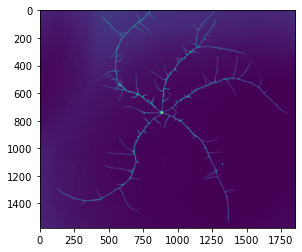

In [36]:
plt.imshow(img_gray)

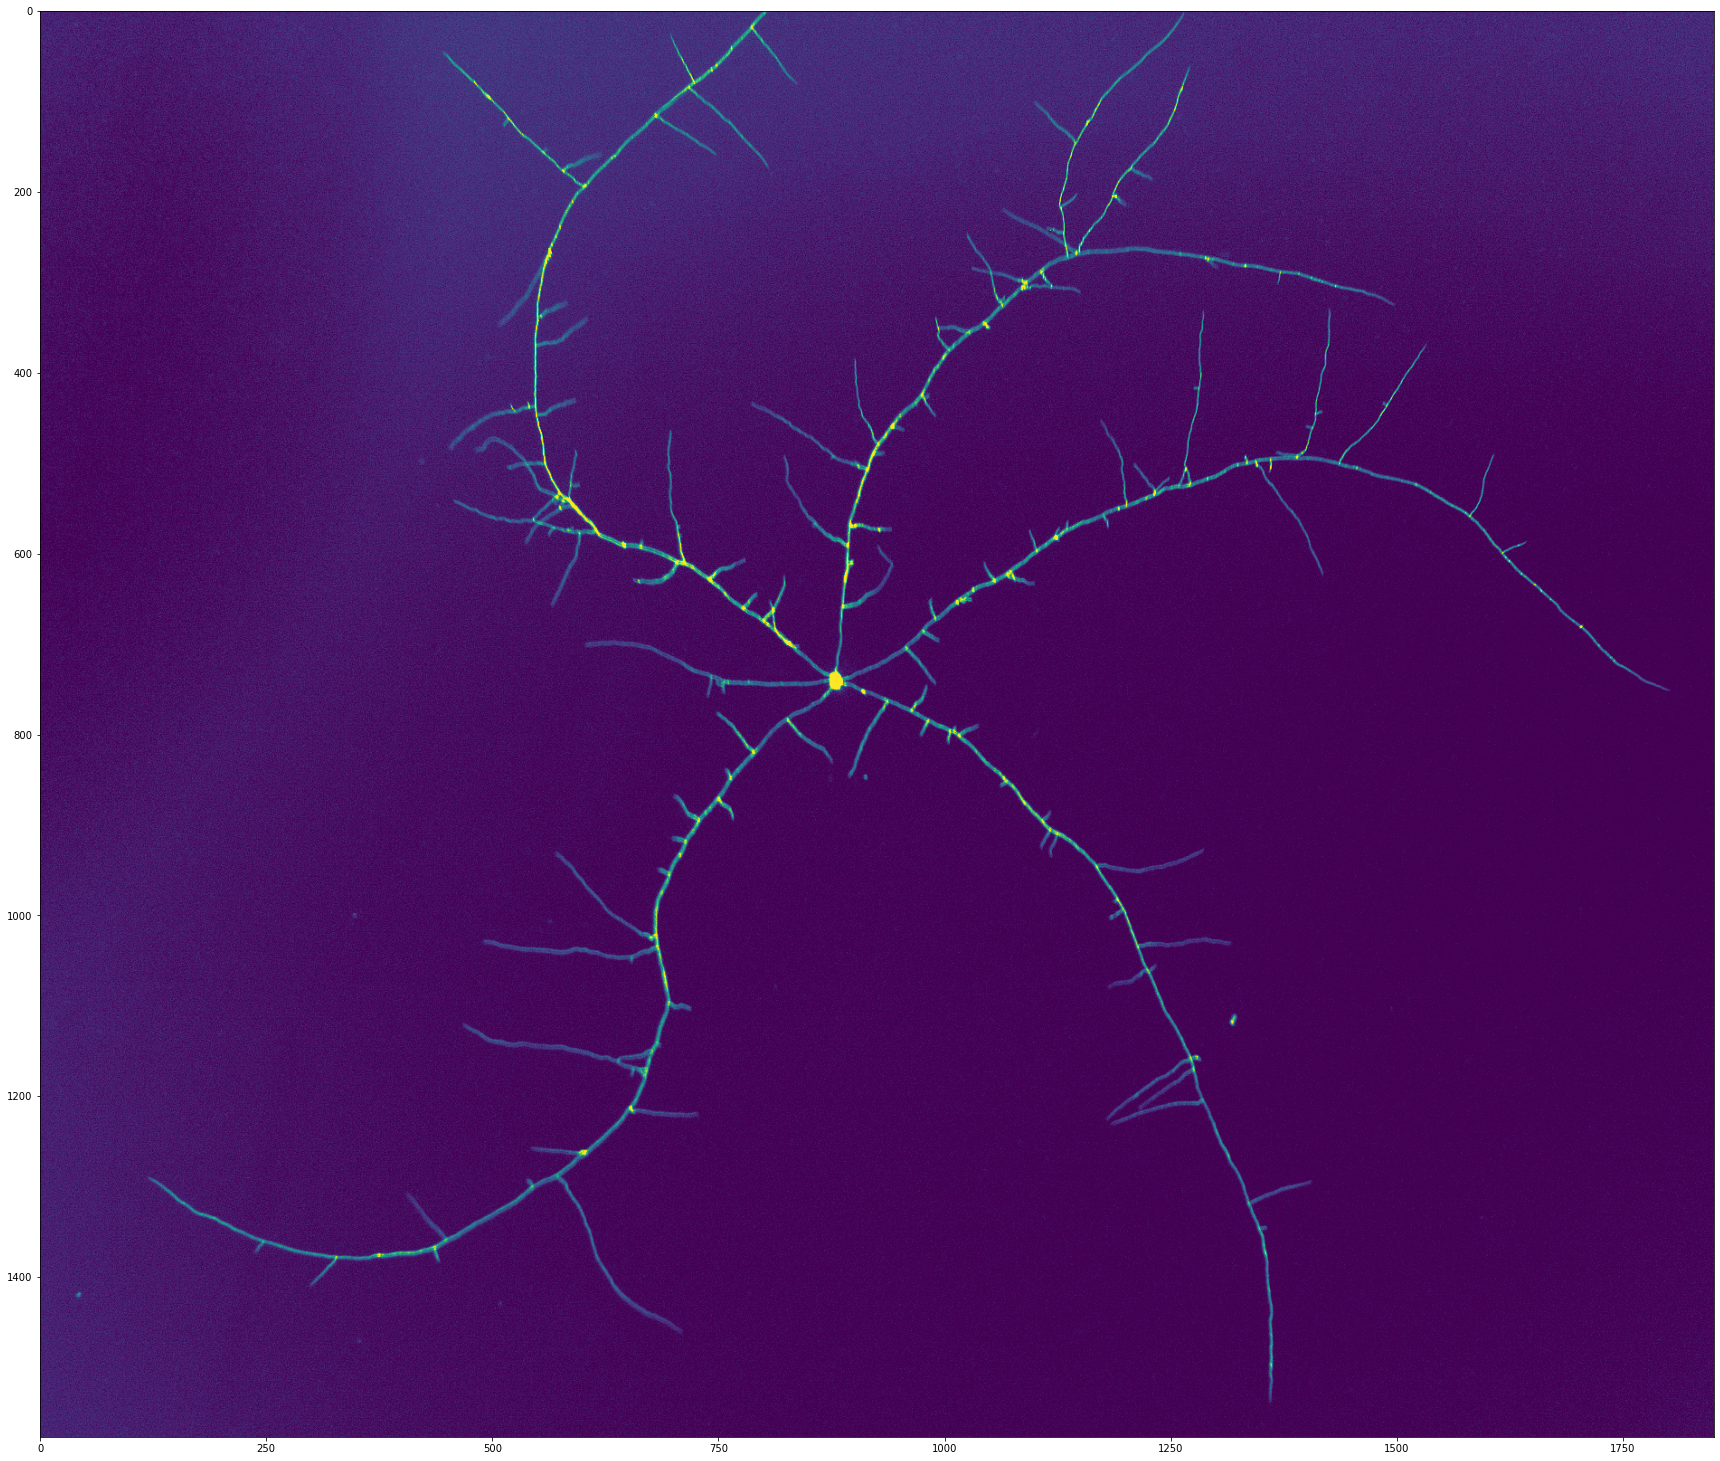

In [5]:
plt.figure(figsize=[30,30])
plt.imshow(img_gray)

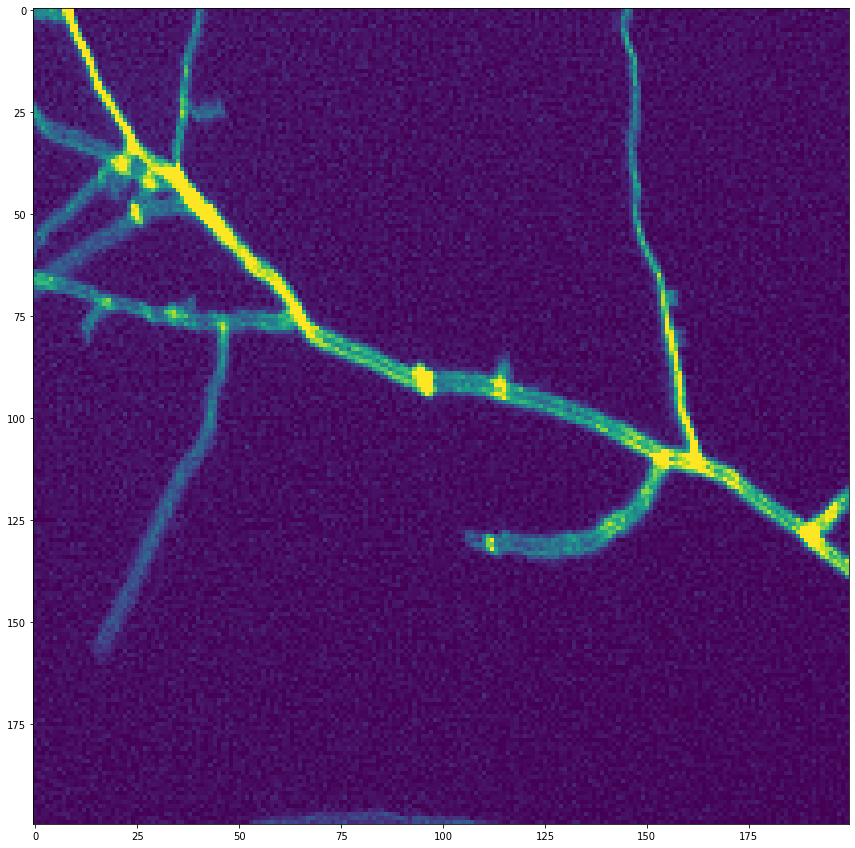

In [6]:
plt.figure(figsize=[15,15])
plt.imshow(img_gray[500:700, 550:750])

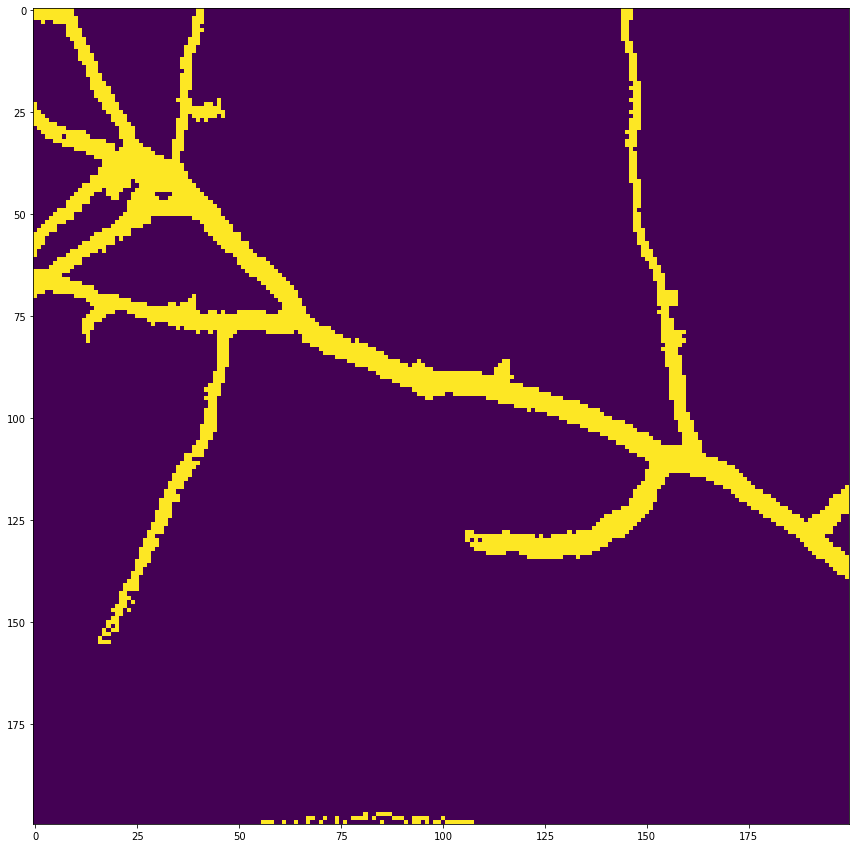

In [7]:
img_binarized = img_gray.copy()
img_binarized[img_binarized >= 50] = 255
img_binarized[img_binarized < 50] = 0

plt.figure(figsize=[15,15])
plt.imshow(img_binarized[500:700, 550:750])

img_binarized = Image.fromarray(img_binarized).convert("1")
#img_binarized

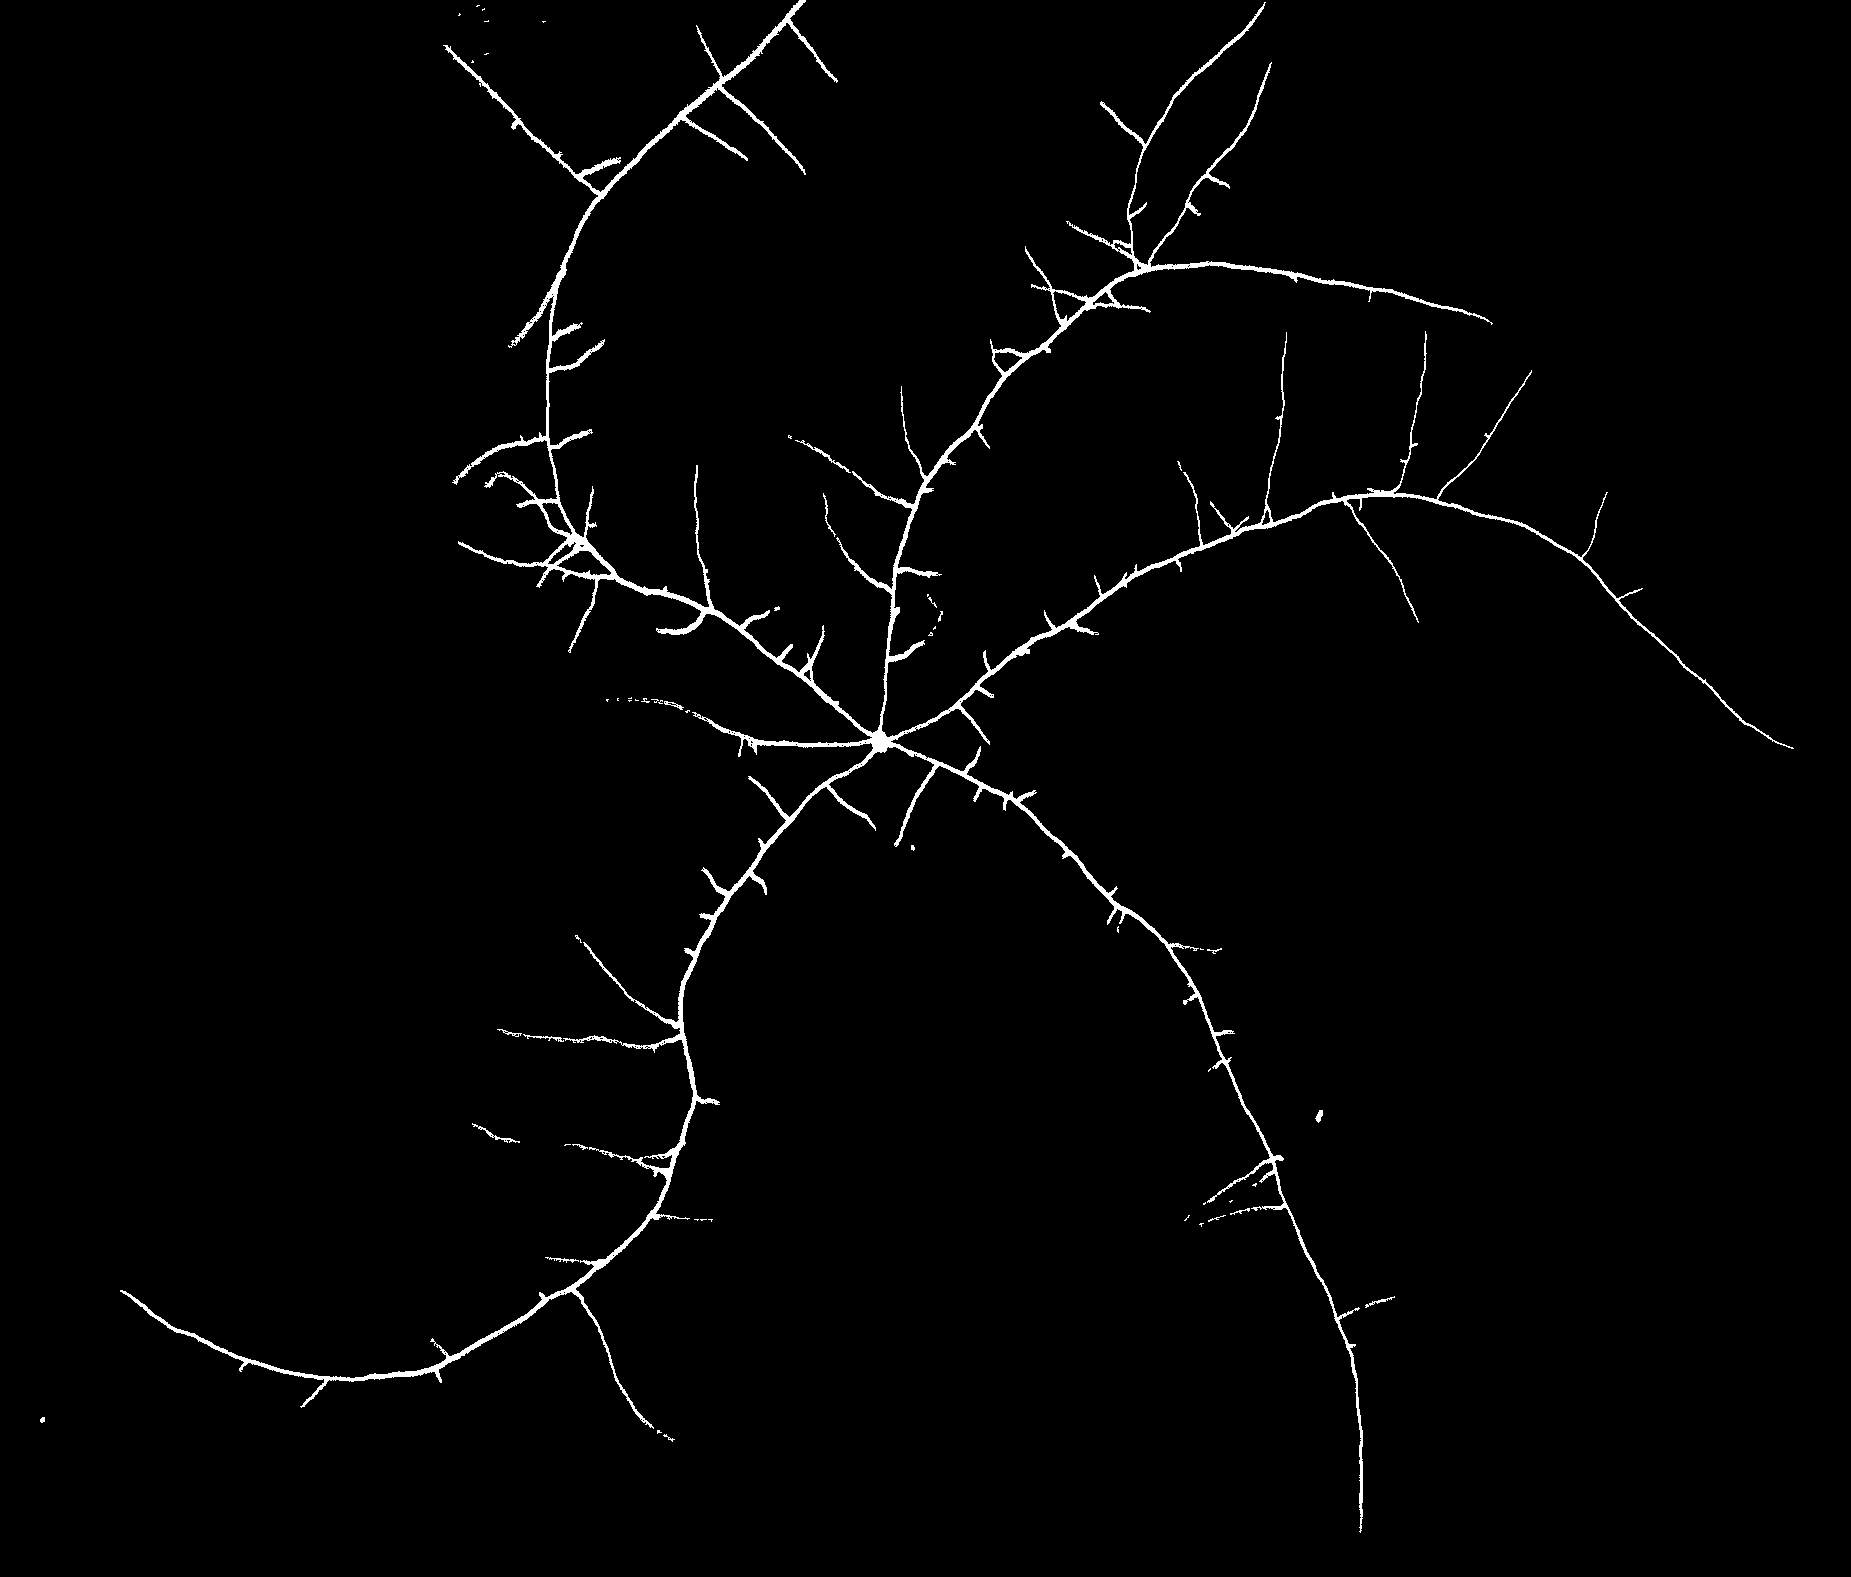

In [8]:
clean_binary_img = morphology.remove_small_objects(np.array(img_binarized), min_size=5)

img_open = Image.fromarray(clean_binary_img).convert("1")
img_open

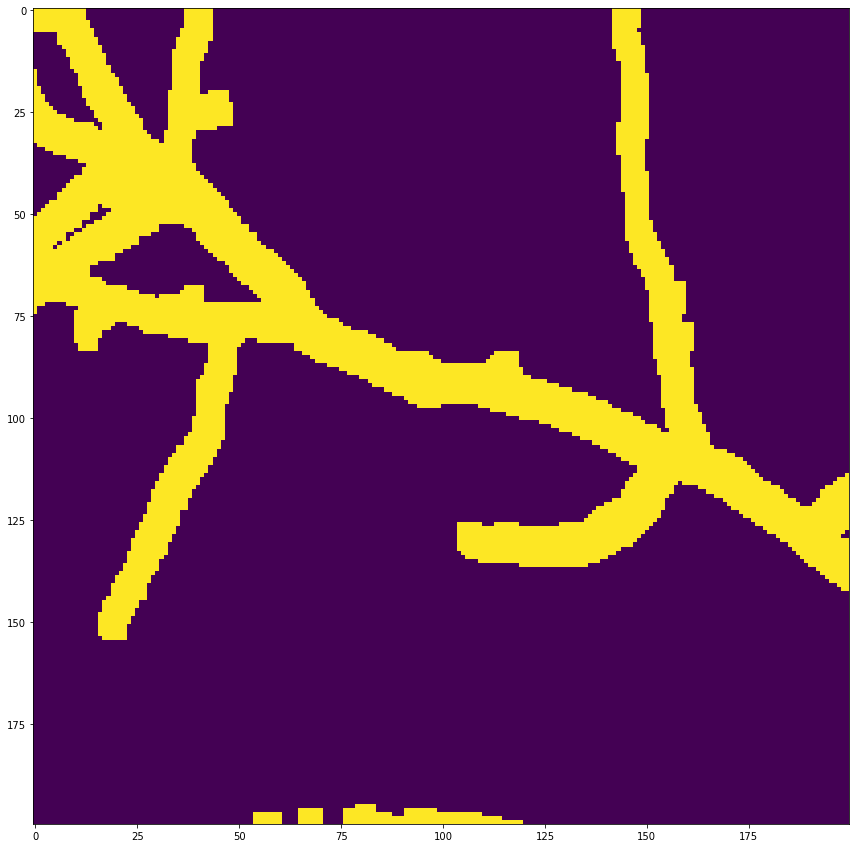

In [9]:
dilated_binary_img = morphology.binary_dilation(np.array(clean_binary_img), selem=morphology.square(5))

plt.figure(figsize=[15,15])
plt.imshow(dilated_binary_img[500:700, 550:750])

img_open = Image.fromarray(dilated_binary_img).convert("1")
#img_open

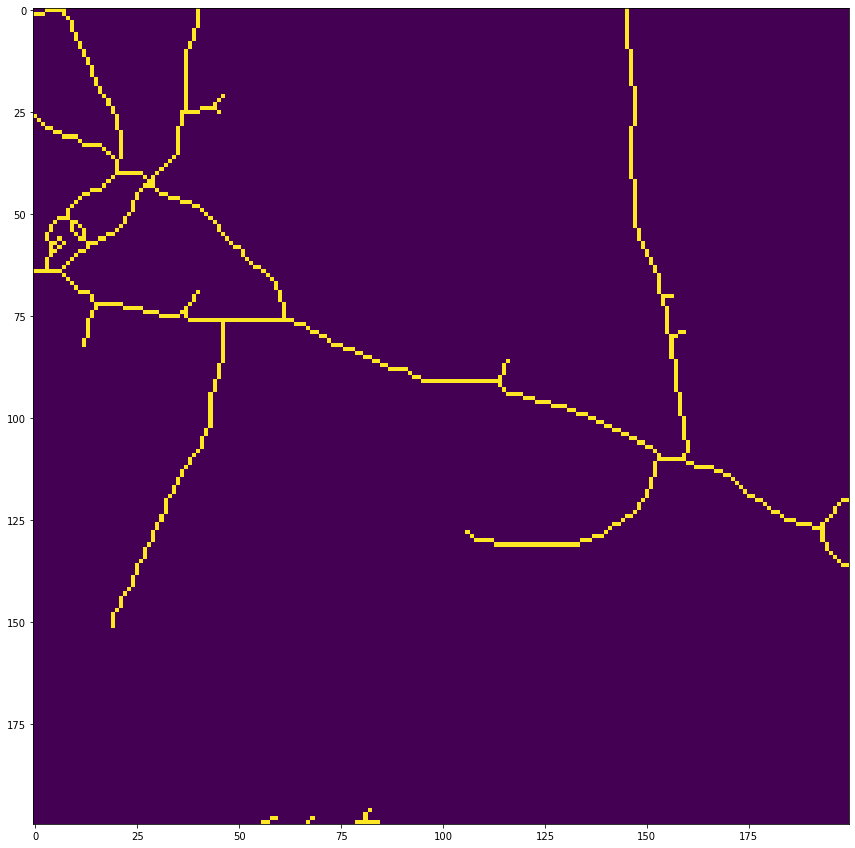

In [10]:
skeleton = morphology.skeletonize(dilated_binary_img)

plt.figure(figsize=[15,15])
plt.imshow(skeleton[500:700, 550:750])

img_open = Image.fromarray(skeleton).convert("1")
#img_open

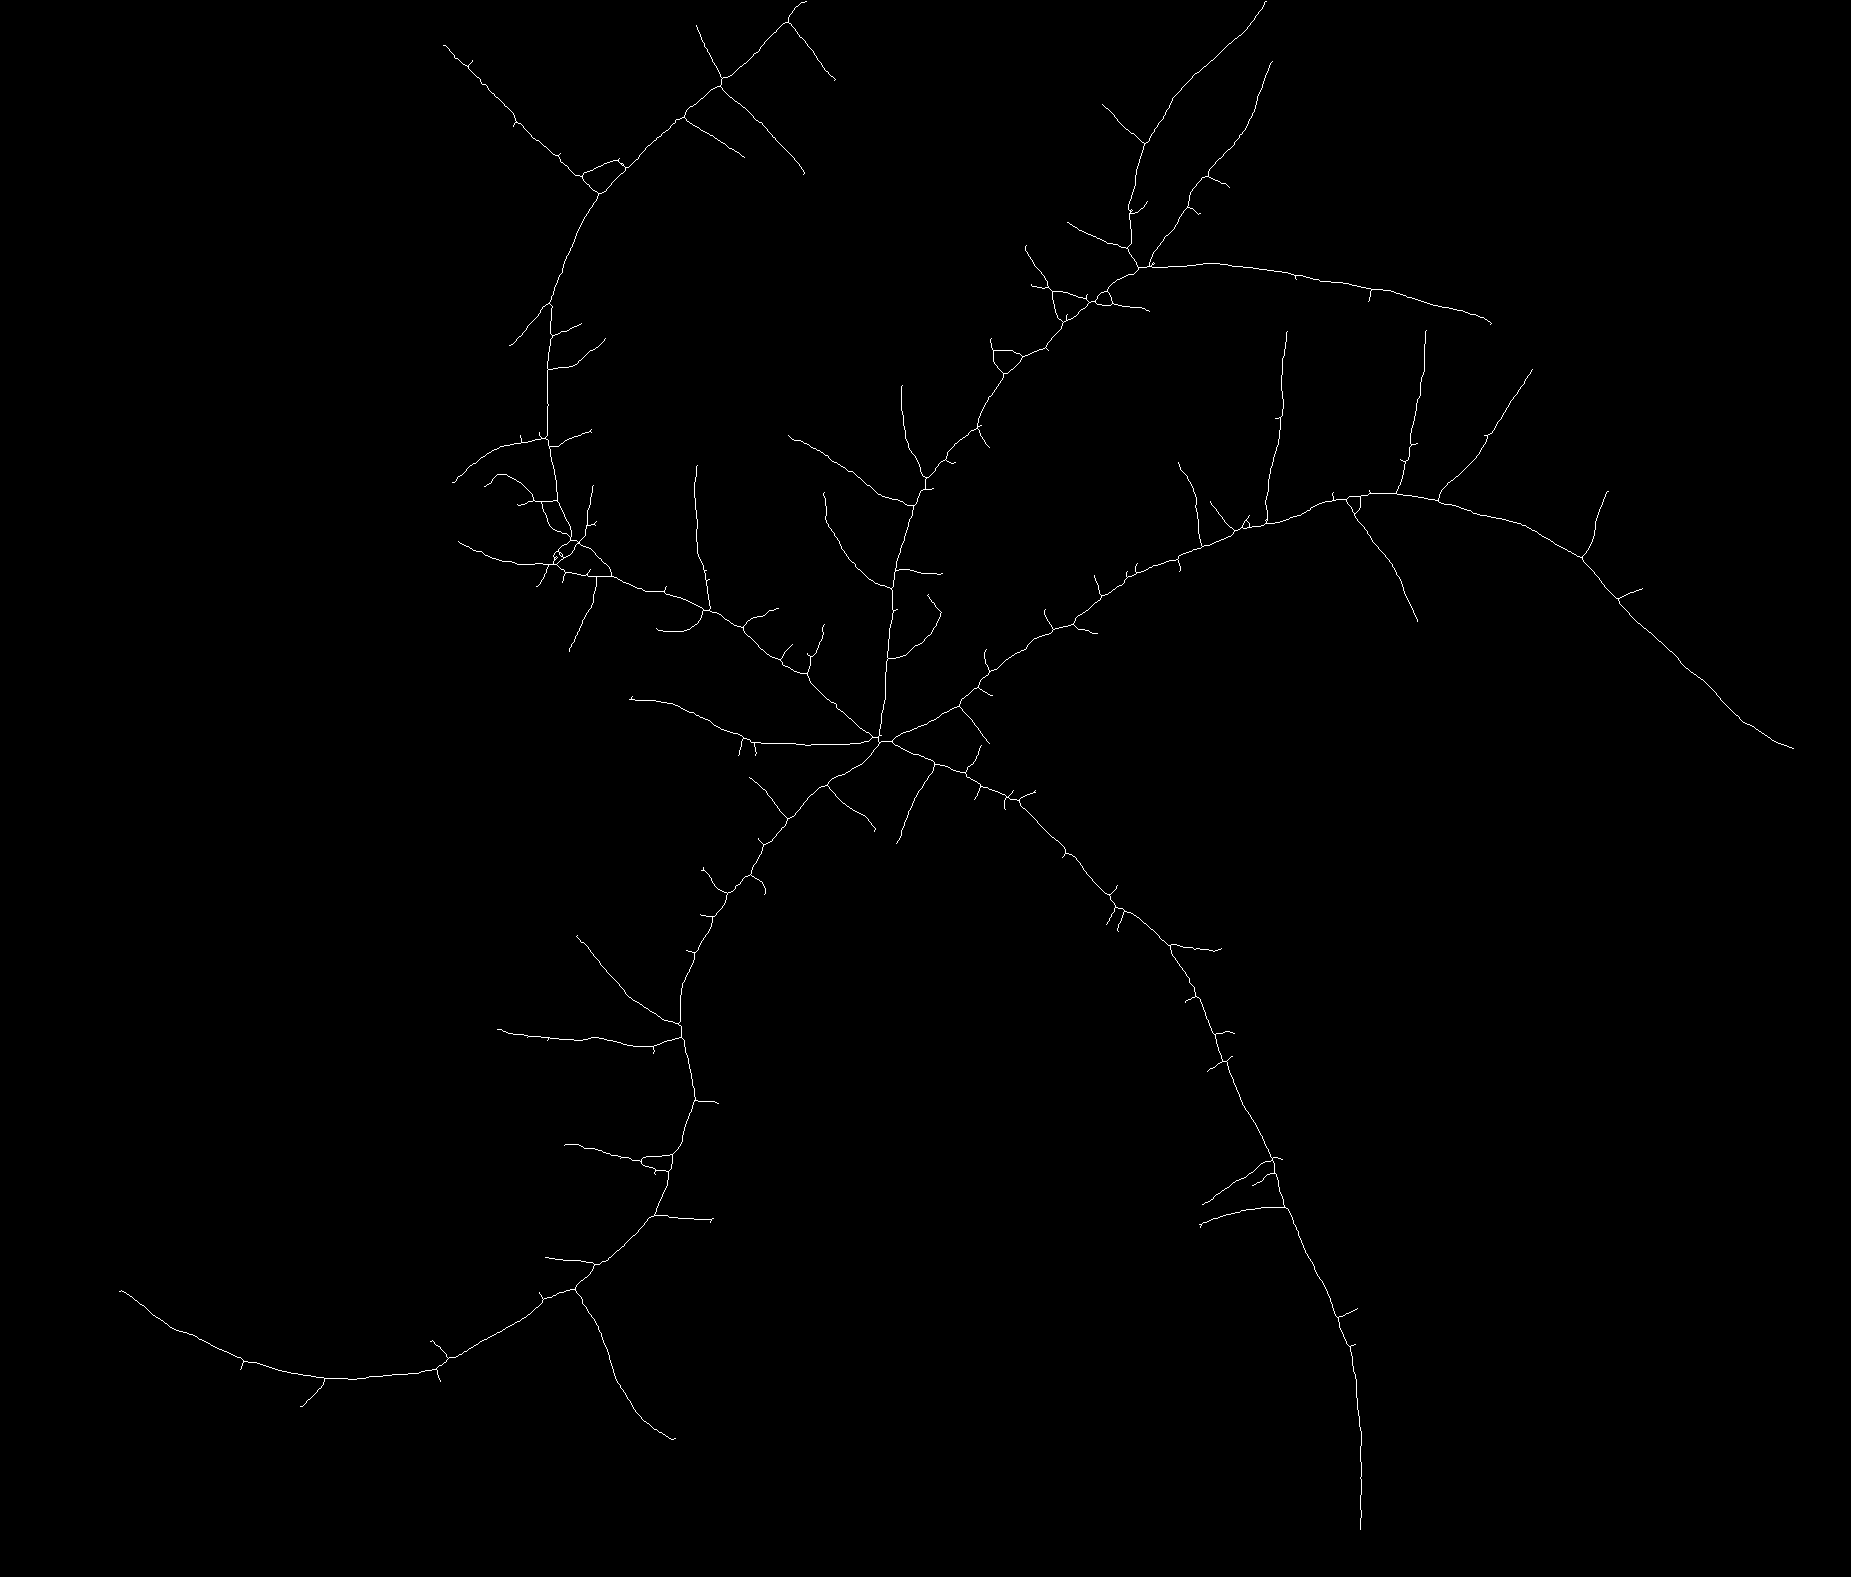

In [11]:
clean_skeleton = morphology.remove_small_objects(np.array(skeleton), min_size=100, connectivity=2)

img_open = Image.fromarray(clean_skeleton).convert("1")
img_open

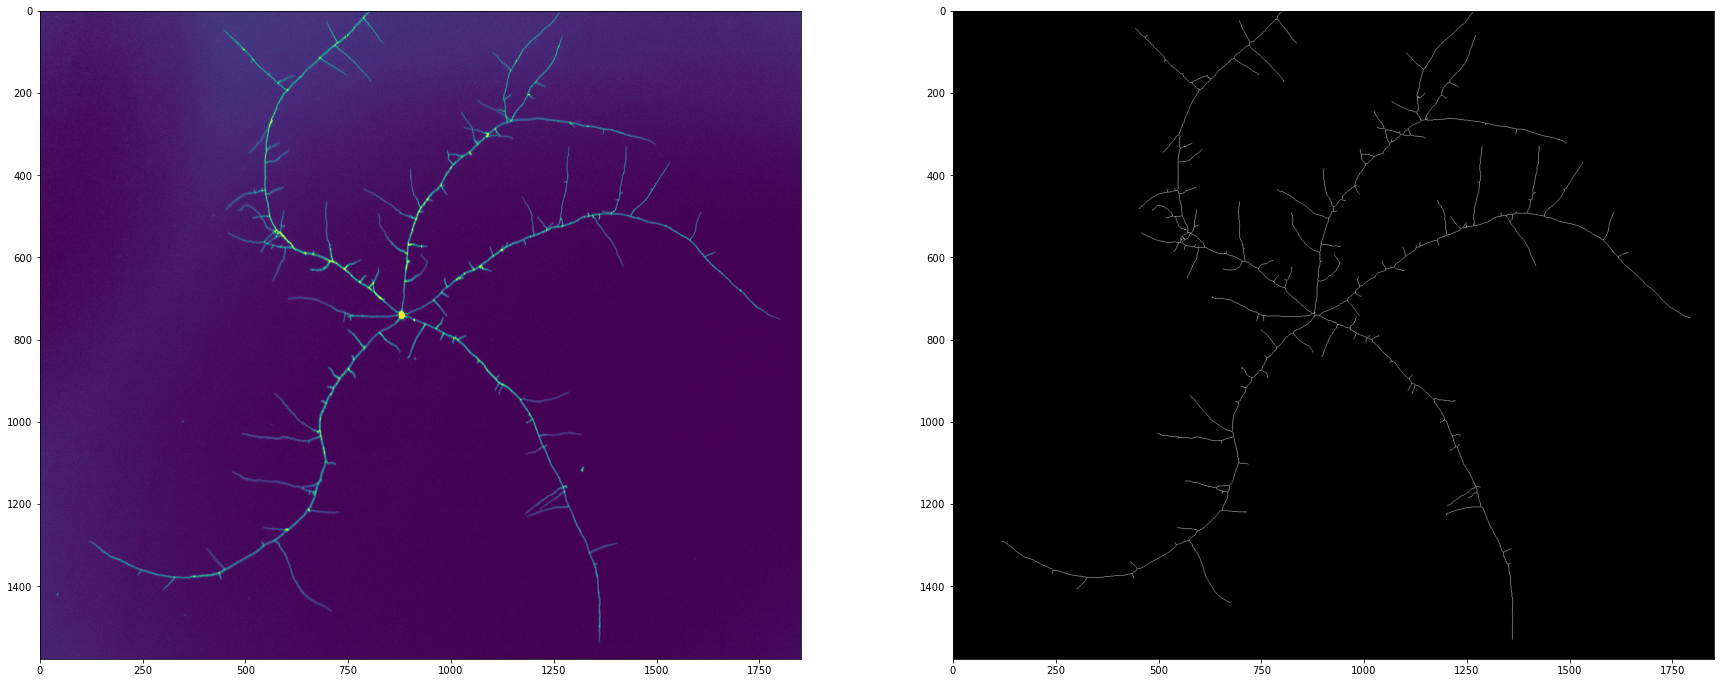

In [40]:
f, ax = plt.subplots(1,2, figsize=[30,30])
ax[0].imshow(img_gray)
ax[1].imshow(img_open)

In [79]:
padded_skeleton = np.pad(clean_skeleton, (2, 2), 'constant', constant_values=False)

h, w = padded_skeleton.shape

branches = np.full([h,w], False, dtype=bool)
tips = np.full([h,w], False, dtype=bool)

In [80]:
coords = np.argwhere(padded_skeleton)

In [81]:
for i in coords:
    x, y = i[0], i[1]
    neighbourhood = np.array(padded_skeleton[x-1:x+2, y-1:y+2])
    branch_neighbourhood = np.array(branches[x-2:x+3, y-2:y+3])
    if np.sum(neighbourhood) == 4 and np.sum(branch_neighbourhood) == 0:
        branches[x,y] = True
    elif np.sum(neighbourhood) == 2:
        tips[x,y] = True

In [82]:
np.sum(branches)

172

In [83]:
np.sum(tips)

144

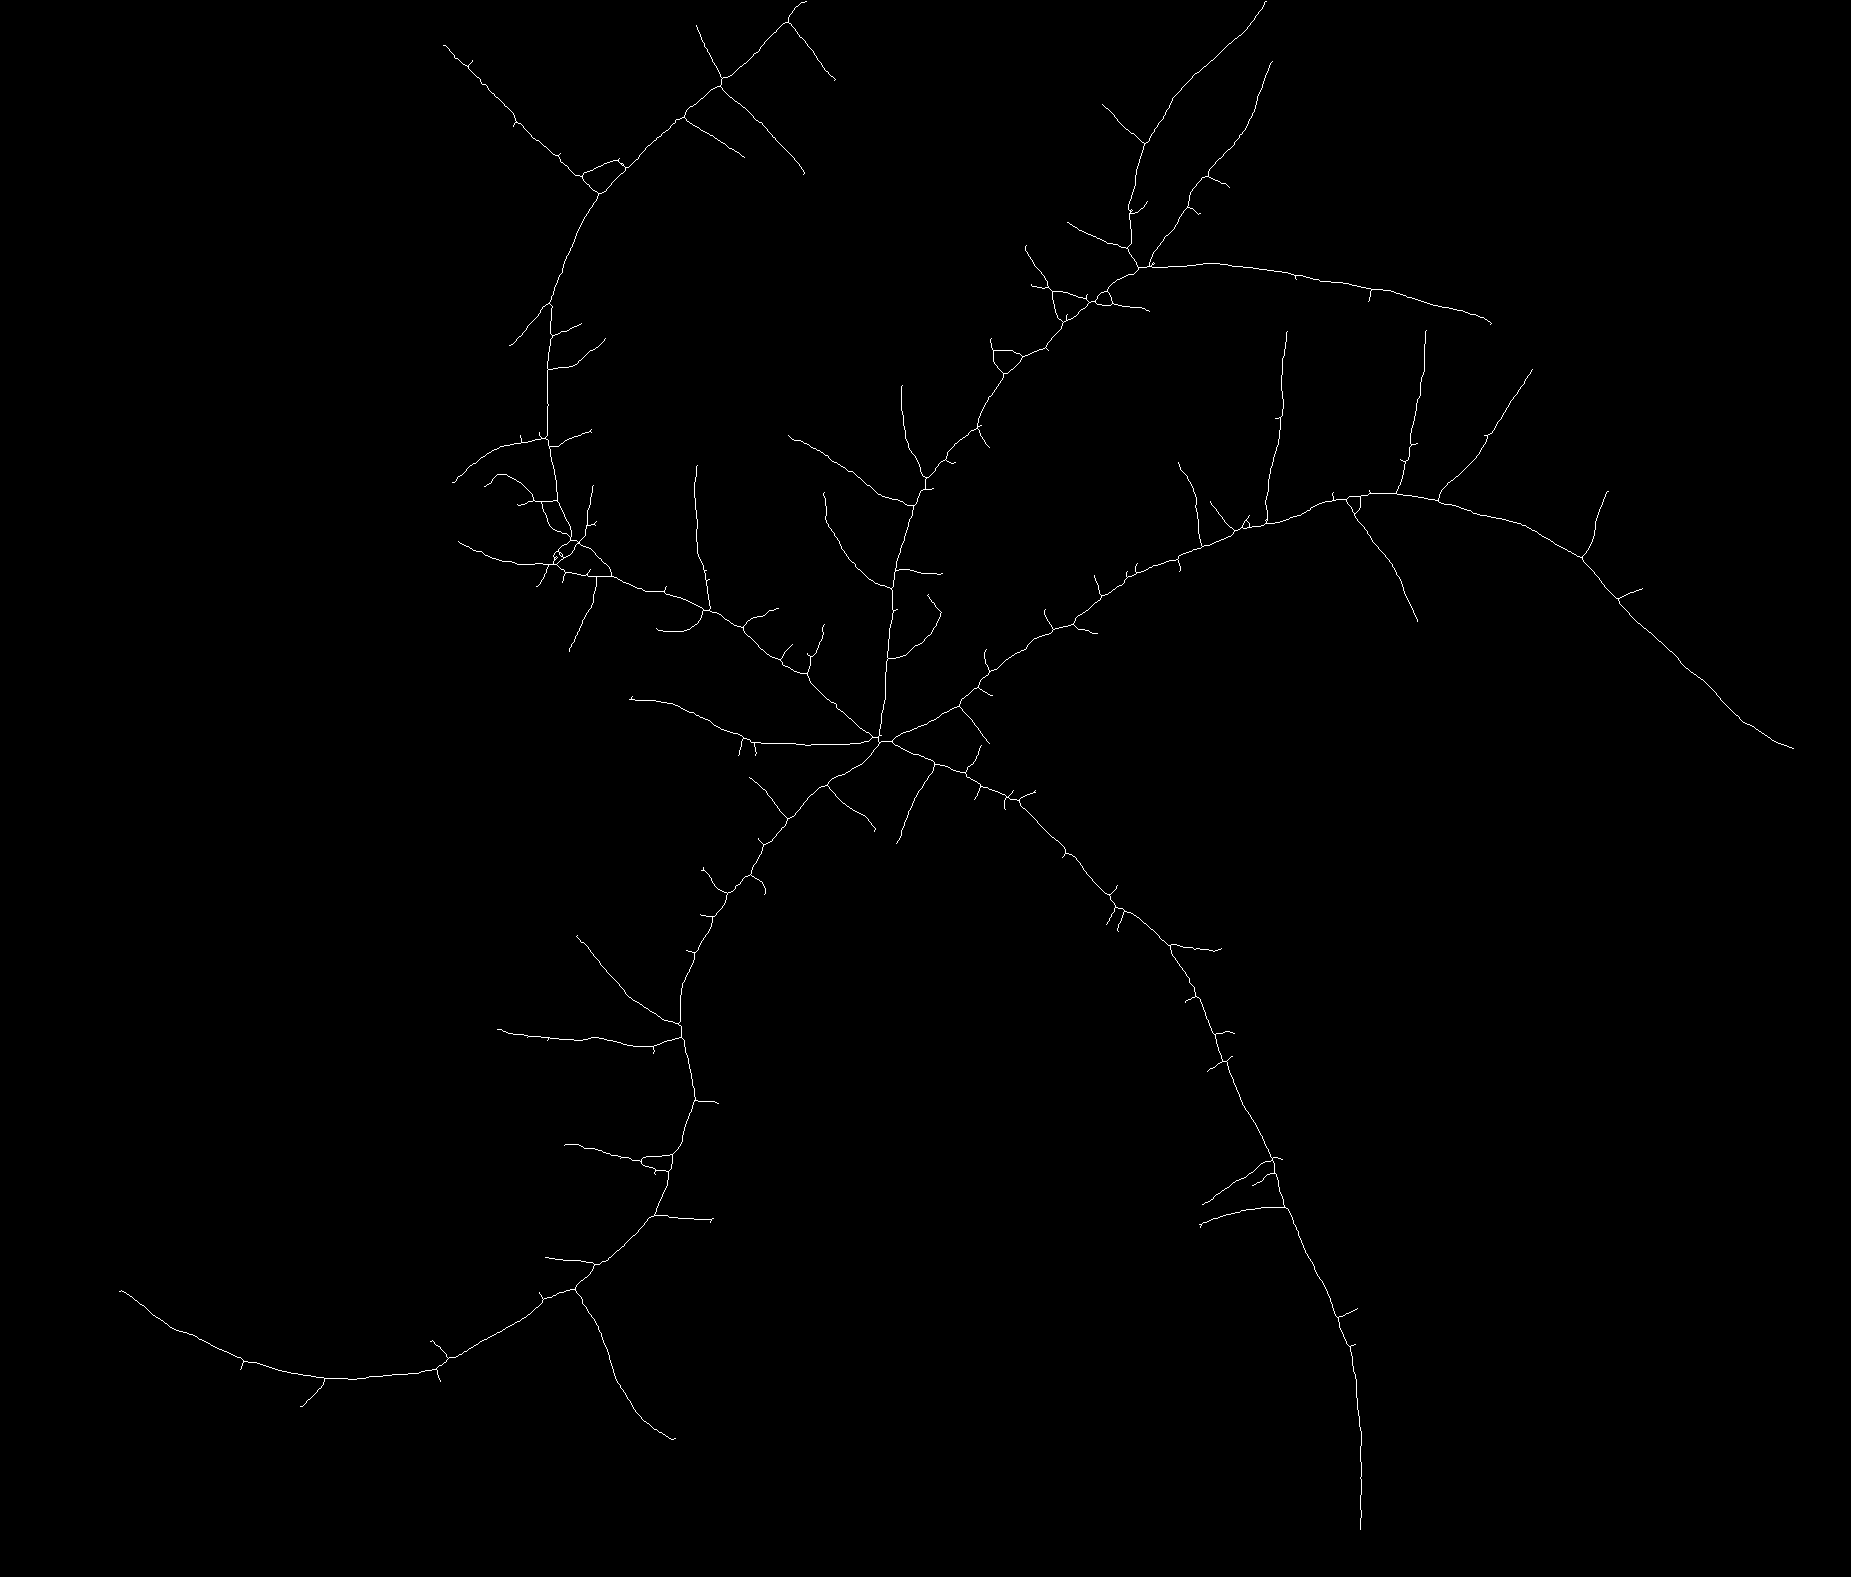

In [84]:
img_open

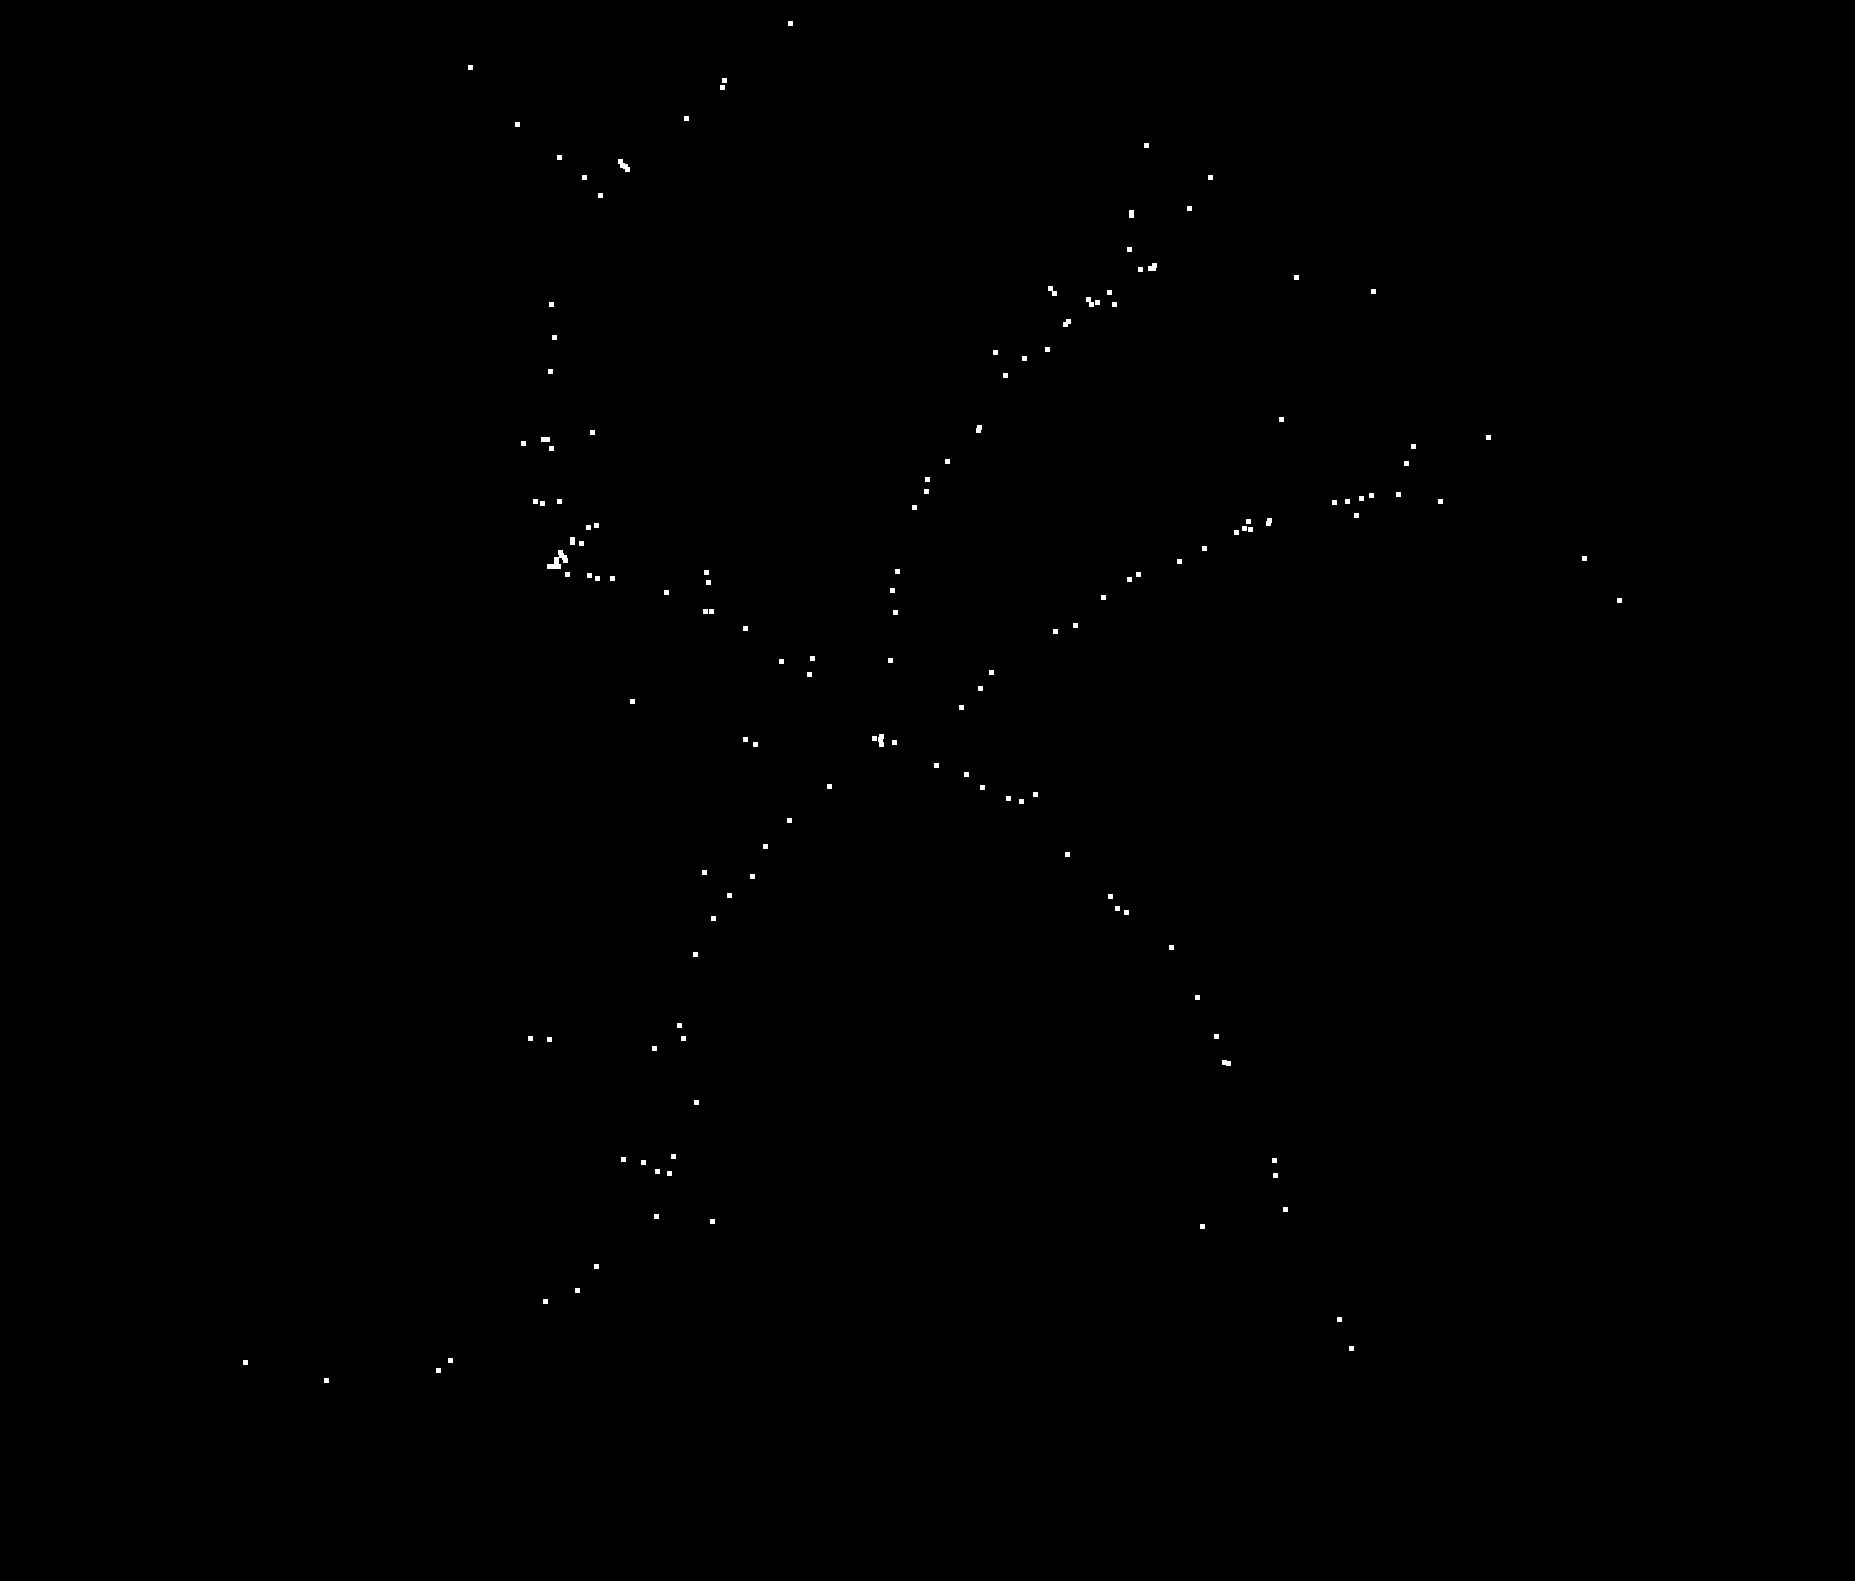

In [86]:
mark_branches = morphology.binary_dilation(branches, morphology.square(5))

Image.fromarray(mark_branches).convert("1")

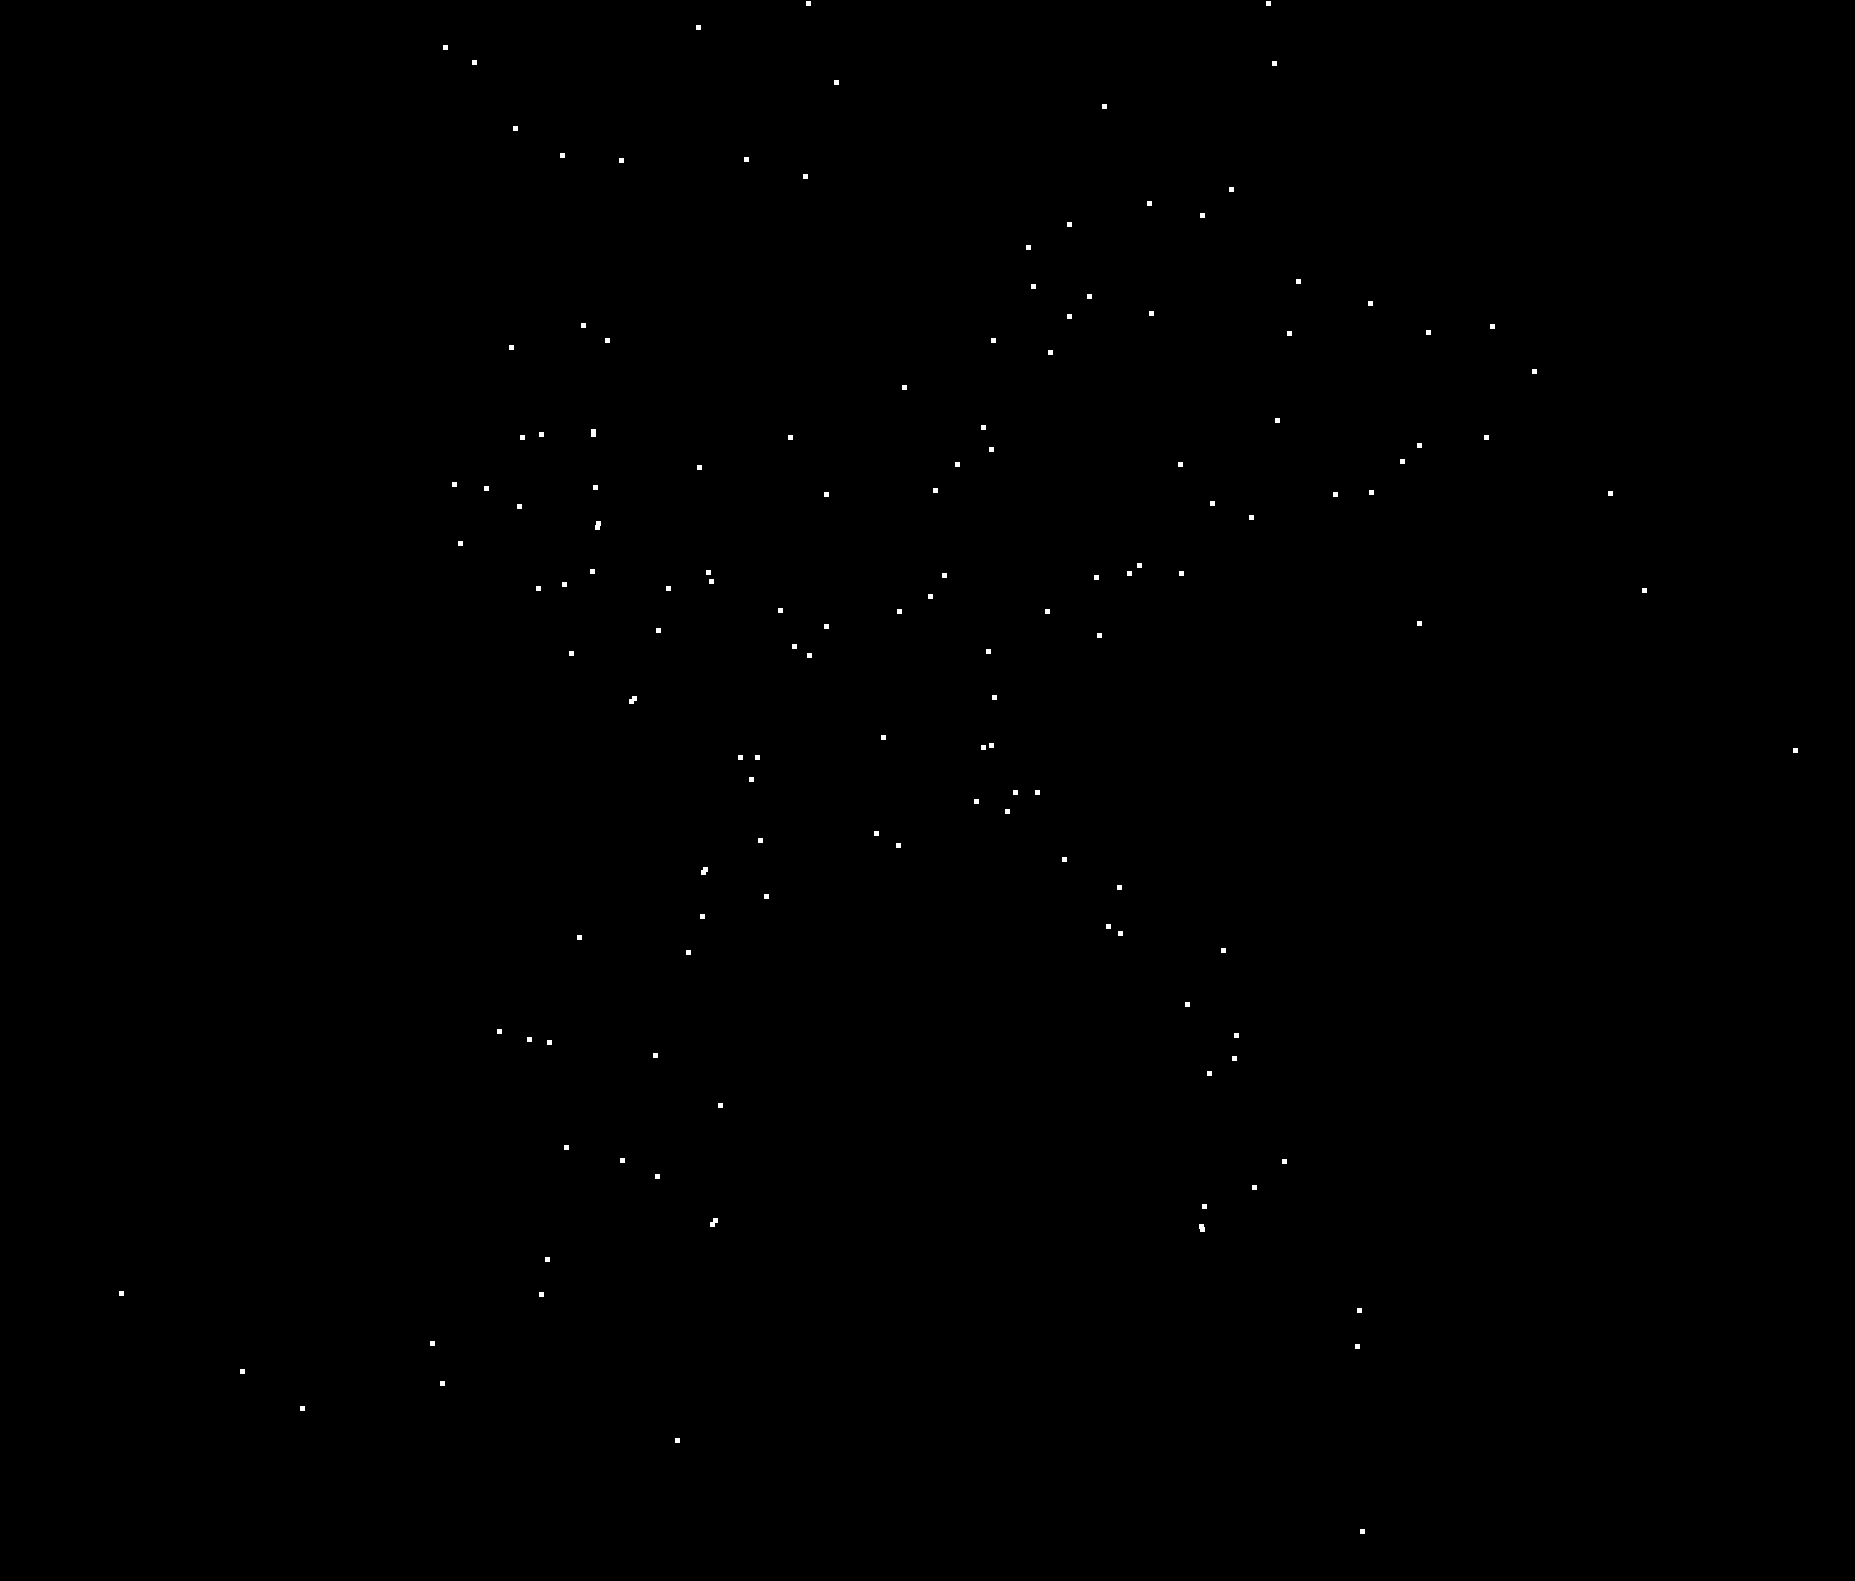

In [87]:
mark_tips = morphology.binary_dilation(tips, morphology.square(5))

Image.fromarray(mark_tips).convert("1")

In [94]:
pad_img_gray = np.pad(img_gray, (2, 2), 'constant', constant_values=0)

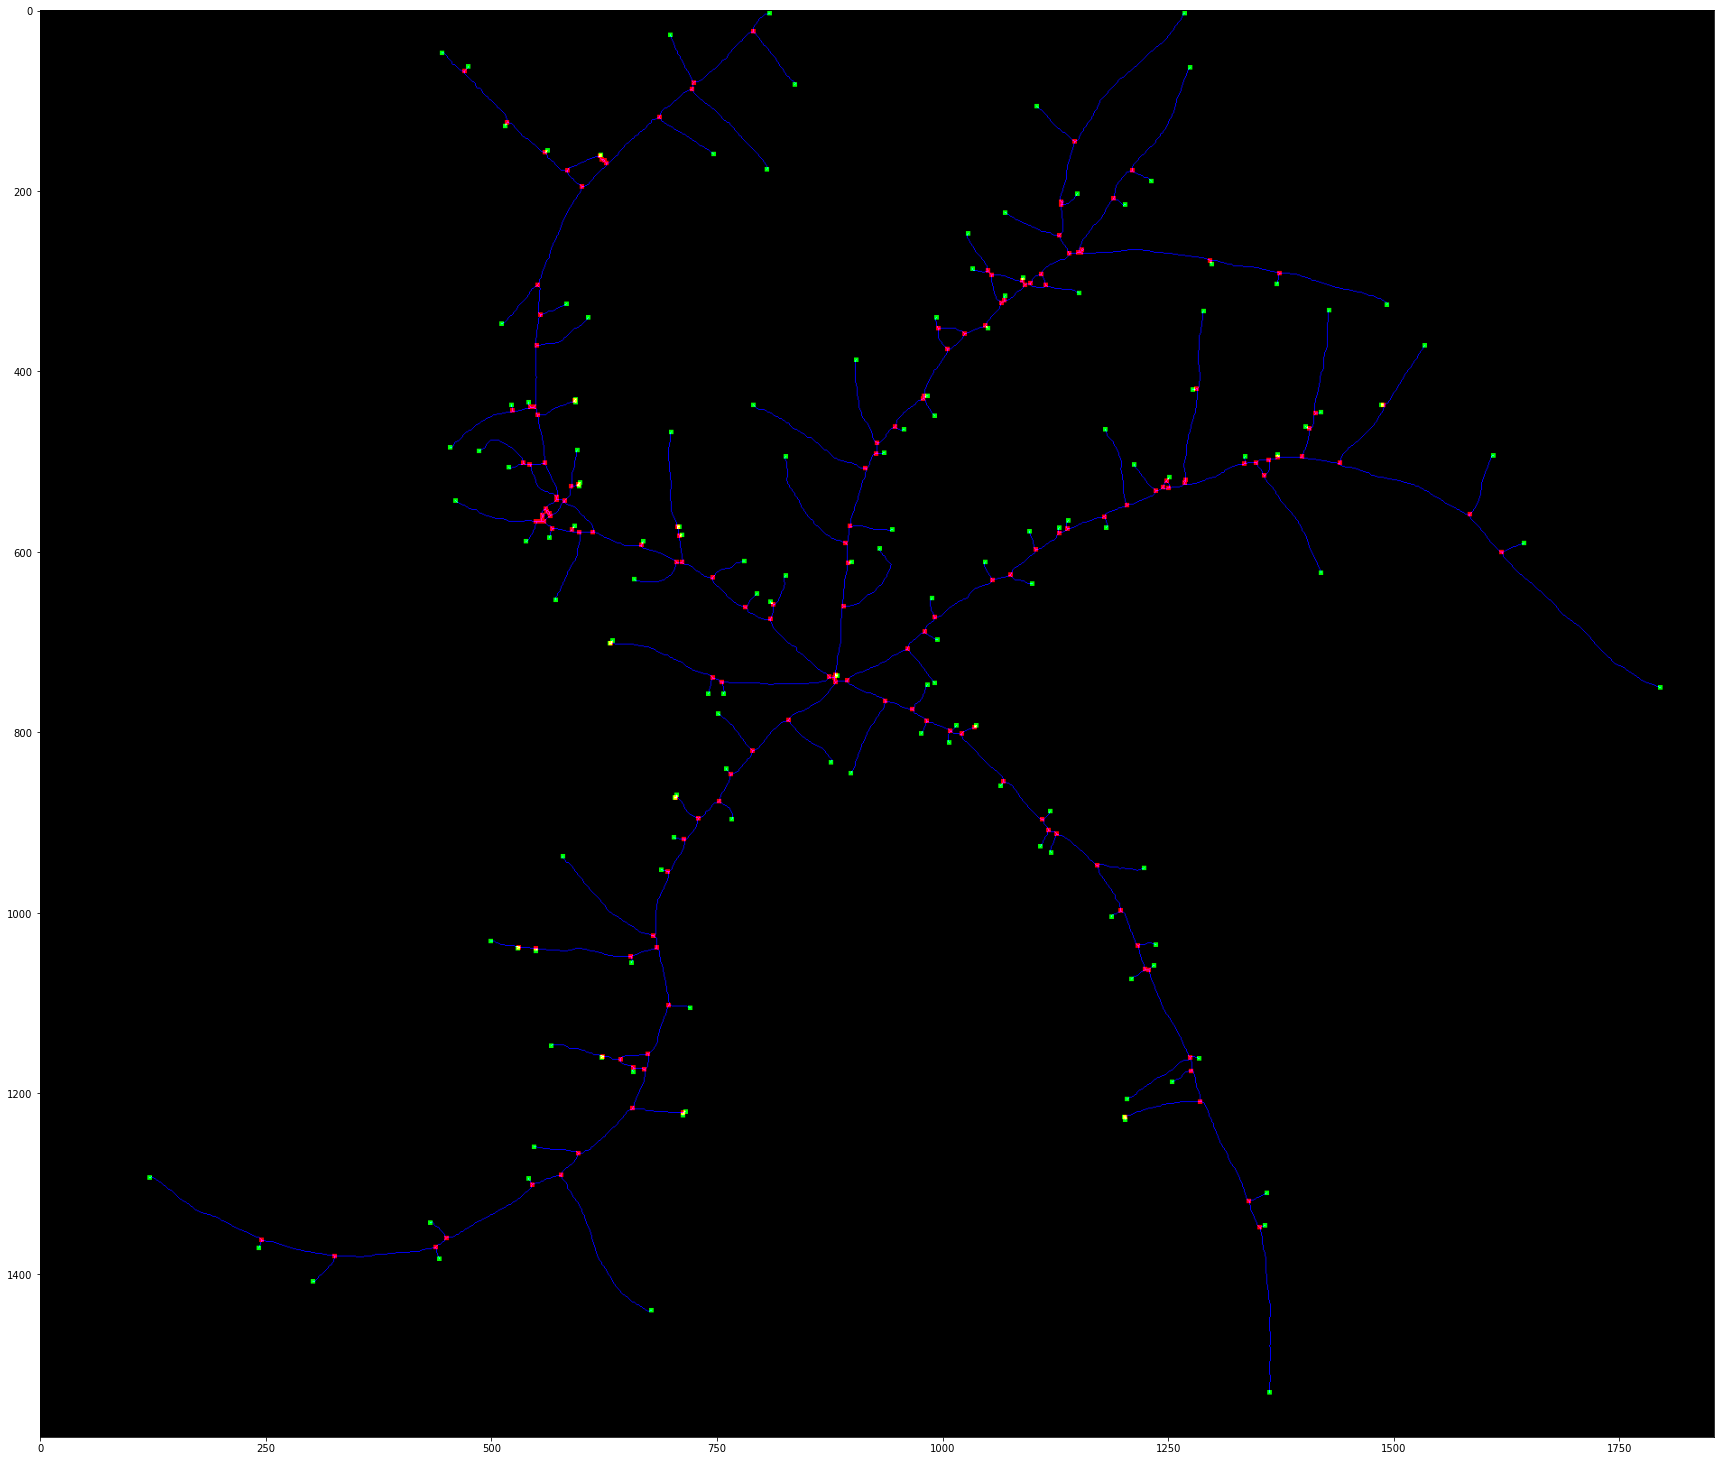

In [95]:
composite = np.array([mark_branches, mark_tips, padded_skeleton], dtype=np.uint8)*255

composite = np.swapaxes(composite, 0, 2)
composite = np.swapaxes(composite, 0, 1)

plt.figure(figsize=[30,30])
plt.imshow(composite)

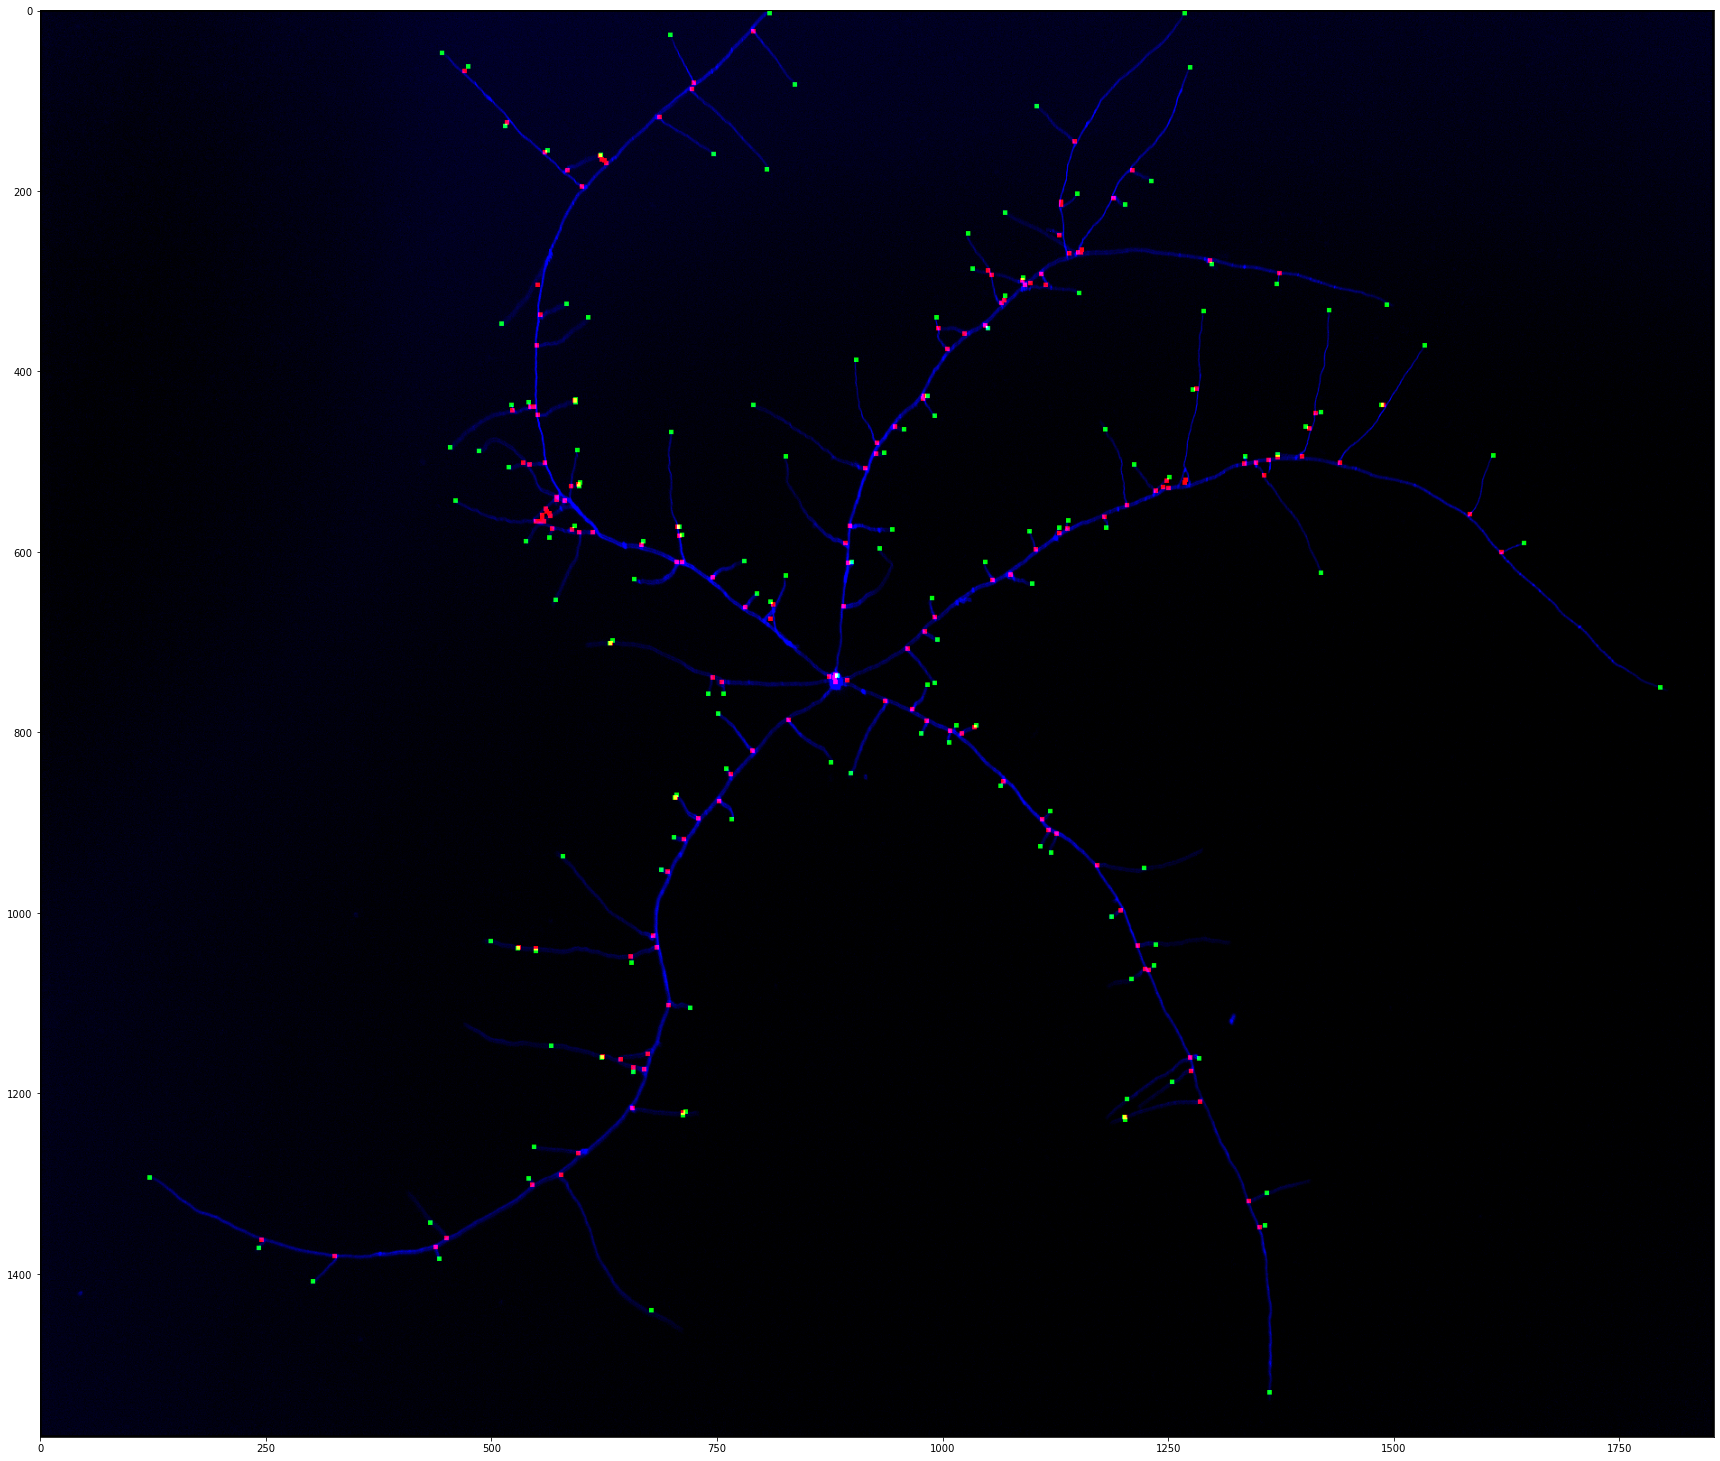

In [97]:
composite = np.array([mark_branches*255, mark_tips*255, pad_img_gray], dtype=np.uint8)

composite = np.swapaxes(composite, 0, 2)
composite = np.swapaxes(composite, 0, 1)

plt.figure(figsize=[30,30])
plt.imshow(composite)

In [ ]:
# Find branches
# Find endpoints
# For each branch endpoint pair, check if they connect, with no other checkpoint in middle of path
